# <span style = "color: green"> Employee attrition Classification </span>

***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('HR-Employee-Attrition.csv')

In [3]:
pd.set_option("display.max_columns", None)

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


In [6]:
df.shape


(1470, 35)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [10]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [11]:
categorical = ['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']
for column in categorical :
    print(f'Unique values in {column} are: {df[column].unique()}')

Unique values in Attrition are: ['Yes' 'No']
Unique values in BusinessTravel are: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Unique values in Department are: ['Sales' 'Research & Development' 'Human Resources']
Unique values in EducationField are: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Unique values in Gender are: ['Female' 'Male']
Unique values in JobRole are: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
Unique values in MaritalStatus are: ['Single' 'Married' 'Divorced']
Unique values in OverTime are: ['Yes' 'No']


In [12]:
for i in df.columns:
    print(f'number of unique in {i} are:{df[i].nunique()}')

number of unique in Age are:43
number of unique in Attrition are:2
number of unique in BusinessTravel are:3
number of unique in DailyRate are:886
number of unique in Department are:3
number of unique in DistanceFromHome are:29
number of unique in Education are:5
number of unique in EducationField are:6
number of unique in EmployeeCount are:1
number of unique in EmployeeNumber are:1470
number of unique in EnvironmentSatisfaction are:4
number of unique in Gender are:2
number of unique in HourlyRate are:71
number of unique in JobInvolvement are:4
number of unique in JobLevel are:5
number of unique in JobRole are:9
number of unique in JobSatisfaction are:4
number of unique in MaritalStatus are:3
number of unique in MonthlyIncome are:1349
number of unique in MonthlyRate are:1427
number of unique in NumCompaniesWorked are:10
number of unique in Over18 are:1
number of unique in OverTime are:2
number of unique in PercentSalaryHike are:15
number of unique in PerformanceRating are:2
number of un

In [13]:
columns = df.columns[df.nunique() == 1]
for column in columns:
    print(f"{column}")


EmployeeCount
Over18
StandardHours


In [14]:
df.drop(columns = ['EmployeeCount','Over18','StandardHours'],inplace = True)

In [15]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [16]:
df.drop(columns = ['EmployeeNumber'],inplace = True)

In [17]:
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [18]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [19]:
result = df.groupby(['Department', 'EducationField'])['Gender'].value_counts()
result

Department              EducationField    Gender
Human Resources         Human Resources   Male       19
                                          Female      8
                        Life Sciences     Female      9
                                          Male        7
                        Medical           Male       11
                                          Female      2
                        Other             Male        3
                        Technical Degree  Male        3
                                          Female      1
Research & Development  Life Sciences     Male      274
                                          Female    166
                        Medical           Male      211
                                          Female    152
                        Other             Male       39
                                          Female     25
                        Technical Degree  Male       58
                                          Female     36

# <span style = "color: orange"> Data Visualization </span>

In [20]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

<Axes: xlabel='Attrition', ylabel='count'>

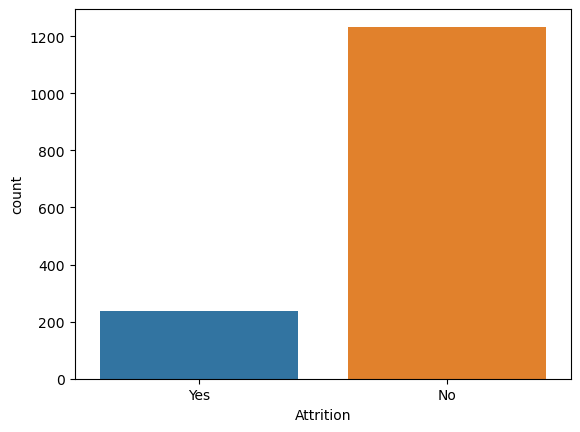

In [21]:
sns.countplot(data=df, x='Attrition')


<Axes: xlabel='Attrition', ylabel='count'>

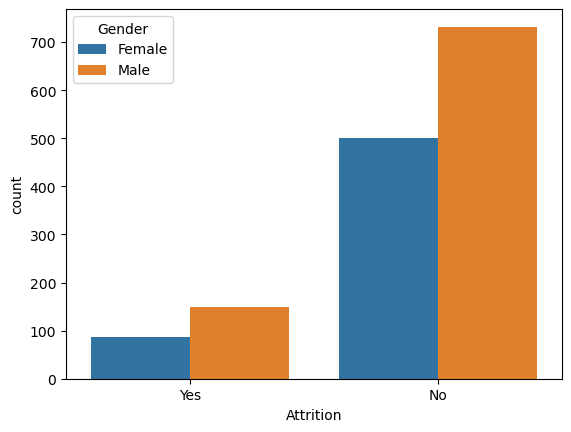

In [22]:
sns.countplot(data=df, x='Attrition' , hue = 'Gender')

<Axes: xlabel='BusinessTravel', ylabel='count'>

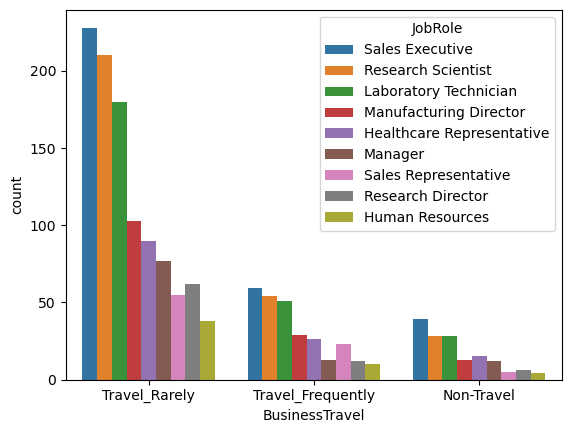

In [23]:
sns.countplot(data=df, x='BusinessTravel' , hue = 'JobRole')

<Axes: xlabel='OverTime', ylabel='count'>

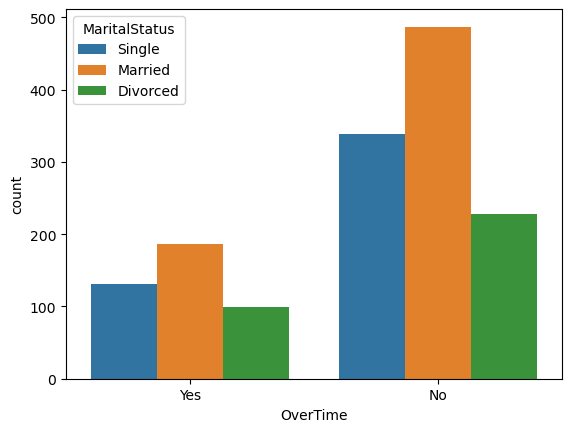

In [24]:
sns.countplot(data = df, x = 'OverTime', hue = 'MaritalStatus')

<Axes: xlabel='MonthlyIncome', ylabel='JobRole'>

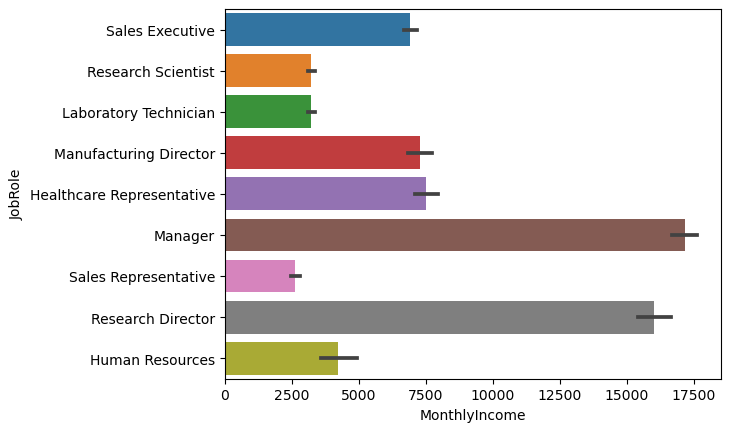

In [25]:
sns.barplot(data = df, x = 'MonthlyIncome', y = 'JobRole')

<Axes: xlabel='MonthlyIncome', ylabel='Gender'>

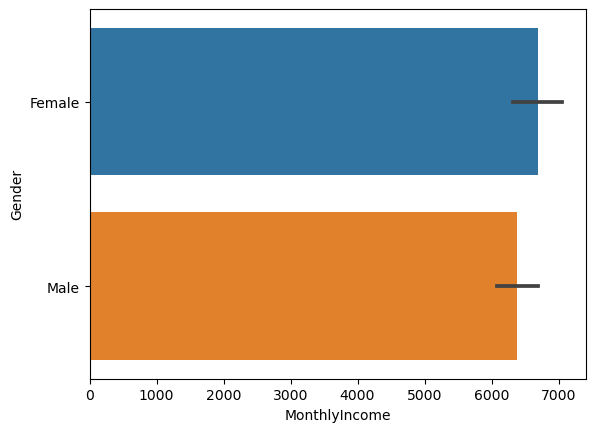

In [26]:
sns.barplot(data = df, x = 'MonthlyIncome', y = 'Gender')

<Axes: xlabel='MonthlyIncome', ylabel='EducationField'>

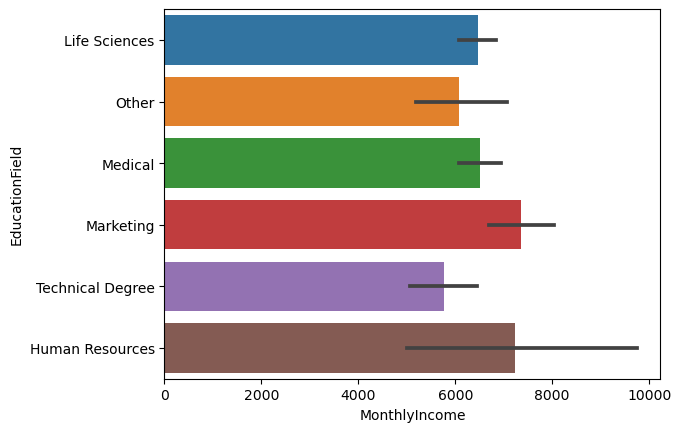

In [27]:
sns.barplot(data = df, x = 'MonthlyIncome', y = 'EducationField')

<Axes: xlabel='JobSatisfaction', ylabel='count'>

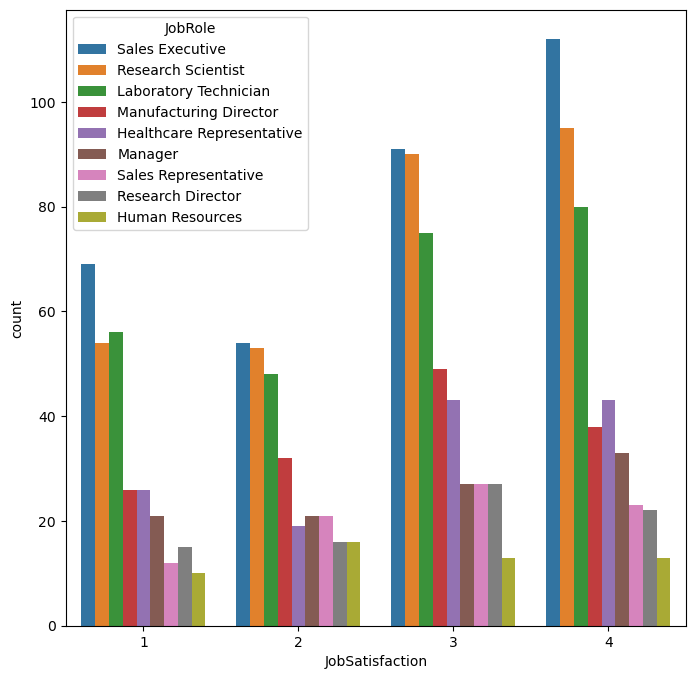

In [28]:
plt.figure(figsize = (8,8))
sns.countplot(data = df, x = 'JobSatisfaction', hue = 'JobRole')

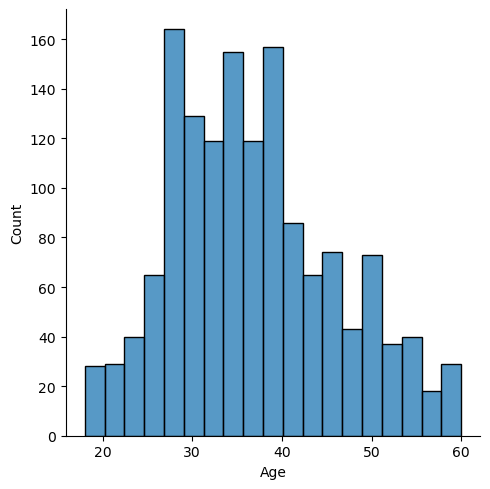

In [29]:
sns.displot(data = df,x = 'Age')

In [30]:
def Attri(x):
    if x == 'Yes':
        return 1
    else:
        return 0

In [31]:
df['Attrition'] = df['Attrition'].apply(Attri)
df['Attrition'].unique()

array([1, 0], dtype=int64)

In [32]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [33]:
newdf = pd.get_dummies(df)
newdf.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,49,0,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,37,1,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,33,0,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,27,0,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0


In [34]:
newdf.shape

(1470, 52)

In [35]:
for i in newdf.columns:
    print(f'Unique values in {i} are: {newdf[i].unique()}')

Unique values in Age are: [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Unique values in Attrition are: [1 0]
Unique values in DailyRate are: [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  967 1496 1169 1

In [36]:
X = newdf.drop(columns = ['Attrition'])
y = newdf['Attrition']

In [37]:
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler()

In [38]:
X = pd.DataFrame(scaled.fit_transform(X),columns = X.columns)

In [39]:
X.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0.446350,0.742527,-1.010909,-0.891688,-0.660531,1.383138,0.379672,-0.057788,1.153254,-0.108350,0.726020,2.125136,-1.150554,-0.426230,-1.584178,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834,-0.3371,-0.481859,0.639841,-0.211604,-1.374051,1.515244,-0.136788,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,1.224745,-1.224745,-0.312785,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,-0.534873,-0.918921,1.458650,-1.591746,1.591746
1,1.322365,-1.297775,-0.147150,-1.868426,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,-0.291719,1.488876,-0.678049,2.129306,2.346151,1.191438,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541,-0.3371,2.075297,-1.562889,-0.211604,0.727775,-0.659960,-0.136788,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,-0.816497,0.816497,-0.312785,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,-0.534873,1.088232,-0.685565,0.628241,-0.628241
2,0.008343,1.414363,-0.887515,-0.891688,1.169781,1.284725,-1.026167,-0.961486,0.246200,-0.937654,-1.674841,1.324226,-0.057267,-0.426230,-0.658973,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935,-0.3371,-0.481859,0.639841,-0.211604,0.727775,-0.659960,-0.136788,-0.837490,-0.348255,-0.679141,4.114223,-0.314093,-0.816497,0.816497,-0.312785,-0.191498,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,-0.918921,1.458650,-1.591746,1.591746
3,-0.429664,1.461466,-0.764121,1.061787,1.169781,-0.486709,0.379672,-0.961486,0.246200,-0.763634,1.243211,-0.678049,-1.150554,-0.426230,0.266233,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935,-0.3371,2.075297,-1.562889,-0.211604,0.727775,-0.659960,-0.136788,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,1.224745,-1.224745,-0.312785,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,-0.534873,1.088232,-0.685565,-1.591746,1.591746
4,-1.086676,-0.524295,-0.887515,-1.868426,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,-0.644858,0.325900,2.525591,-0.877232,-0.426230,1.191438,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227,-0.3371,-0.481859,0.639841,-0.211604,0.727775,-0.659960,-0.136788,-0.837490,-0.348255,1.472448,-0.243059,-0.314093,-0.816497,0.816497,-0.312785,-0.191498,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,1.088232,-0.685565,0.628241,-0.628241


In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)

### Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

In [43]:
model1 = LogisticRegression()


In [44]:
model1.fit(X_train,y_train)

LogisticRegression()

In [45]:
y_pred = model1.predict(X_test)

In [46]:
model1.score(X_train,y_train)

0.8979591836734694

In [47]:
accuracy_score(y_test,y_pred)

0.8673469387755102

In [48]:
confusion_matrix(y_test,y_pred)

array([[235,  10],
       [ 29,  20]], dtype=int64)

In [49]:
score1 = np.mean(cross_val_score(LogisticRegression(),X, y,cv=3))
score1

0.8768707482993197

<Axes: >

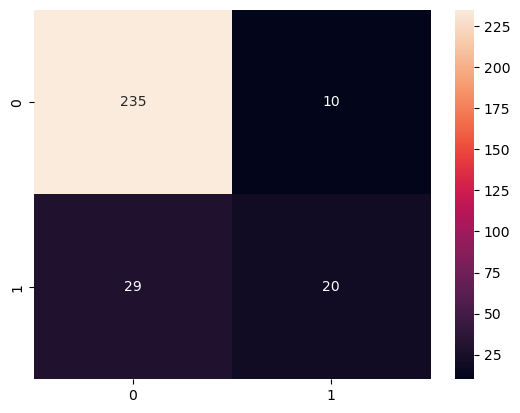

In [50]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt = 'd')

### Random Forest Classifier


In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [52]:
model2 = RandomForestClassifier()

In [53]:
model2.fit(X_train,y_train)

RandomForestClassifier()

In [54]:
y_pred1 = model2.predict(X_test)

In [55]:
params = {'max_depth': list(range(1,10)) ,'n_estimators': list(range(1,10)),'n_jobs': [1,2],'random_state': list(range(1,50))}

In [56]:
clf = GridSearchCV(RandomForestClassifier(),params,cv = 2, scoring='accuracy')
clf.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'n_jobs': [1, 2],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy')

In [57]:
print(f'Best estimator are: {clf.best_estimator_}')
print(f'Best parameters are: {clf.best_params_}')
print(f'Best score is: {clf.best_score_}')

Best estimator are: RandomForestClassifier(max_depth=7, n_estimators=9, n_jobs=1, random_state=42)
Best parameters are: {'max_depth': 7, 'n_estimators': 9, 'n_jobs': 1, 'random_state': 42}
Best score is: 0.8647959183673469


In [58]:
print(f'accuracy score {accuracy_score(y_test,y_pred1)}')
print(f'Confusion metrics: {confusion_matrix(y_test,y_pred1)}')
print(f'Classification report: {classification_report(y_test,y_pred1)}')

accuracy score 0.8469387755102041
Confusion metrics: [[241   4]
 [ 41   8]]
Classification report:               precision    recall  f1-score   support

           0       0.85      0.98      0.91       245
           1       0.67      0.16      0.26        49

    accuracy                           0.85       294
   macro avg       0.76      0.57      0.59       294
weighted avg       0.82      0.85      0.81       294



In [59]:
score2 = np.mean(cross_val_score(RandomForestClassifier(),X, y,cv=3))
score2

0.8564625850340136

<Axes: >

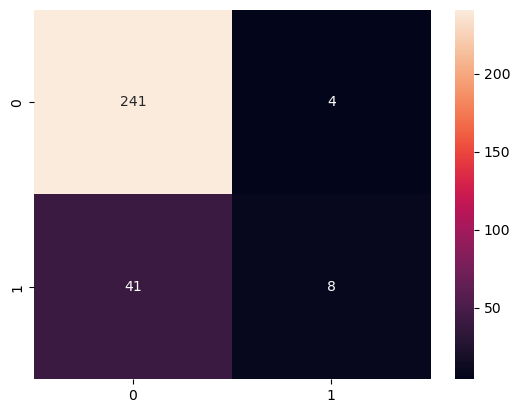

In [60]:
sns.heatmap(confusion_matrix(y_test,y_pred1),annot = True,fmt = 'd')

### Support Vector Machine

In [61]:
from sklearn.svm import SVC

In [62]:
model3 = SVC()

In [63]:
model3.fit(X_train,y_train)

SVC()

In [64]:
y_pred2 = model3.predict(X_test)

In [65]:
sparams = {'C': list(range(1,10)),'degree': list(range(1,5)),'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

In [66]:
gsv = GridSearchCV(SVC(),sparams,cv = 2, scoring='accuracy')
gsv.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'degree': [1, 2, 3, 4],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [67]:
print(f'Best estimator are: {gsv.best_estimator_}')
print(f'Best parameters are: {gsv.best_params_}')
print(f'Best score is: {gsv.best_score_}')

Best estimator are: SVC(C=8, degree=1, kernel='poly')
Best parameters are: {'C': 8, 'degree': 1, 'kernel': 'poly'}
Best score is: 0.8758503401360545


In [68]:
print(f'accuracy score {accuracy_score(y_test,y_pred2)}')
print(f'Confusion metrics: {confusion_matrix(y_test,y_pred2)}')
print(f'Classification report: {classification_report(y_test,y_pred2)}')

accuracy score 0.8571428571428571
Confusion metrics: [[241   4]
 [ 38  11]]
Classification report:               precision    recall  f1-score   support

           0       0.86      0.98      0.92       245
           1       0.73      0.22      0.34        49

    accuracy                           0.86       294
   macro avg       0.80      0.60      0.63       294
weighted avg       0.84      0.86      0.82       294



In [69]:
score3 = np.mean(cross_val_score(SVC(),X, y,cv=3))
score3

0.8673469387755102

<Axes: >

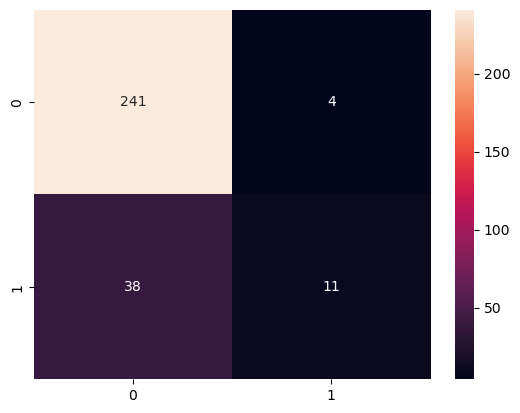

In [70]:
sns.heatmap(confusion_matrix(y_test,y_pred2),annot = True, fmt = 'd')

### AdaBoost: Classifier

In [71]:
from sklearn.ensemble import AdaBoostClassifier
model4 = AdaBoostClassifier()
model4.fit(X_train,y_train)

AdaBoostClassifier()

In [72]:
y_pred3 = model4.predict(X_test)

In [73]:
print(f'accuracy score {accuracy_score(y_test,y_pred3)}')
print(f'Confusion metrics: {confusion_matrix(y_test,y_pred3)}')
print(f'Classification report: {classification_report(y_test,y_pred3)}')

accuracy score 0.8571428571428571
Confusion metrics: [[235  10]
 [ 32  17]]
Classification report:               precision    recall  f1-score   support

           0       0.88      0.96      0.92       245
           1       0.63      0.35      0.45        49

    accuracy                           0.86       294
   macro avg       0.75      0.65      0.68       294
weighted avg       0.84      0.86      0.84       294



In [74]:
score4 = np.mean(cross_val_score(AdaBoostClassifier(),X, y,cv=3))
score4

0.8721088435374149

<Axes: >

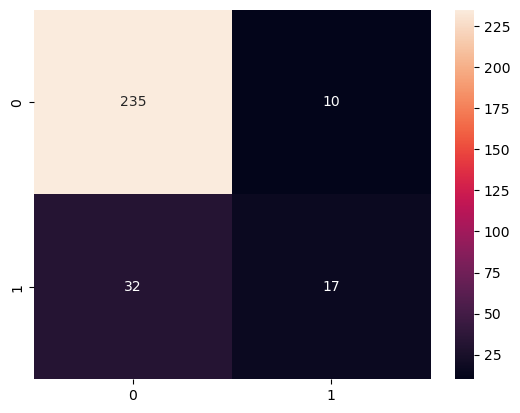

In [75]:
sns.heatmap(confusion_matrix(y_test,y_pred3),annot= True,fmt = 'd')

In [76]:
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Support Vector Machine', SVC()),
    ('Random Forest', RandomForestClassifier()),
    ('AdaBoost', AdaBoostClassifier())
]

scores_dict = {'Model': [], 'Score': []}

for model_name, model in models:
    scores = cross_val_score(model, X, y, cv=5)
    mean_score = scores.mean()
    
    scores_dict['Model'].append(model_name)
    scores_dict['Score'].append(mean_score)
scores_df = pd.DataFrame(scores_dict)
scores_df = scores_df.sort_values(by='Score', ascending=False)
scores_df

,Model,Score
0,Logistic Regression,0.882993
3,AdaBoost,0.871429
1,Support Vector Machine,0.864626
2,Random Forest,0.857823


In [77]:
from sklearn.decomposition import PCA

In [78]:
pca = PCA(n_components = 2)

In [79]:
x_pca = pca.fit_transform(X)

In [80]:
train_X = pca.transform(X_train)
test_X = pca.transform(X_test)

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
rfc = RandomForestClassifier(max_depth=9, n_estimators=7, n_jobs=1, random_state=8)

In [88]:
rfc.fit(train_X,y_train)

RandomForestClassifier(max_depth=9, n_estimators=7, n_jobs=1, random_state=8)

In [89]:
rfc.score(train_X,y_train)

0.8937074829931972

In [90]:
y_pred = rfc.predict(test_X)

In [91]:
print(f'Confusion matrix : {confusion_matrix(y_test,y_pred)}')
print(f'Classification report: {classification_report(y_test,y_pred)}')

Confusion matrix : [[236   9]
 [ 43   6]]
Classification report:               precision    recall  f1-score   support

           0       0.85      0.96      0.90       245
           1       0.40      0.12      0.19        49

    accuracy                           0.82       294
   macro avg       0.62      0.54      0.54       294
weighted avg       0.77      0.82      0.78       294



<Axes: >

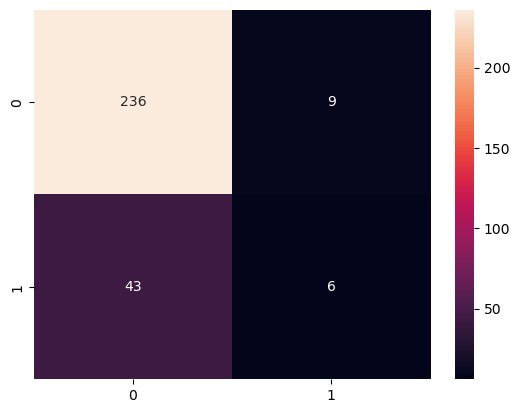

In [92]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt = 'd')